In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [75]:
from tensorflow import keras
import tensorflow as tf

In [53]:
df_train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [54]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

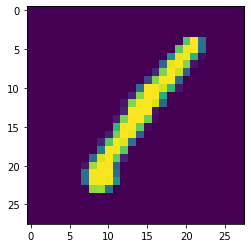

1


In [74]:
test=df_train.iloc[0].drop('label')
print(test.to_numpy().reshape((28, 28)))
import matplotlib.pyplot as plt
plt.imshow(test.to_numpy().reshape((28, 28)))
plt.show()
print(df_train.iloc[0]['label'])

In [56]:
independent=df_train.iloc[:,1::]
independent_sized=independent/255.0
dependent=df_train.iloc[:,:1]
dependent_vec=keras.utils.to_categorical(dependent,10)
dependent.value_counts()

label
1        4684
7        4401
3        4351
9        4188
2        4177
6        4137
0        4132
4        4072
8        4063
5        3795
dtype: int64

In [57]:
print(dependent_vec[2])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
independent_test=df_test/255.0
independent_sized_test=independent_test/255.0

In [59]:
#from sklearn.model_selection import train_test_split 
#X_train,  X_test,Y_train,Y_test = train_test_split(independent_sized,dependent,test_size=0.2,random_state=42)

In [60]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(500, activation='tanh'), 
#     keras.layers.Dense(10, activation='tanh')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy'])

# model.fit(independent_sized, dependent, verbose=True,epochs=50,validation_split=0.2)

In [81]:
model = keras.Sequential()
model.add(keras.layers.Dense(256,activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy'])


model.fit(independent_sized, dependent_vec, verbose=True,epochs=100,validation_split=0.2)

Epoch 1/50
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1378 - accuracy: 0.1303 - val_loss: 0.0895 - val_accuracy: 0.1968
Epoch 2/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0892 - accuracy: 0.2255 - val_loss: 0.0886 - val_accuracy: 0.3108
Epoch 3/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0885 - accuracy: 0.3136 - val_loss: 0.0879 - val_accuracy: 0.3675
Epoch 4/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0878 - accuracy: 0.3695 - val_loss: 0.0872 - val_accuracy: 0.4033
Epoch 5/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0871 - accuracy: 0.3997 - val_loss: 0.0864 - val_accuracy: 0.4256
Epoch 6/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0863 - accuracy: 0.4278 - val_loss: 0.0856 - val_accuracy: 0.4440
Epoch 7/50
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0855 - accuracy: 0.4449 - val_loss: 0.0847 - val_accuracy:

In [62]:
temp=model.predict(independent_test)


In [63]:
independent_test.head()
#independent_sized.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
temp[0]

array([0.25661463, 0.08002424, 0.43021446, 0.08989599, 0.12853038,
       0.06361595, 0.15636688, 0.08739665, 0.12311456, 0.09245309],
      dtype=float32)

In [68]:
np.argmax(temp[0])

2

In [88]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label']=np.argmax(model.predict(independent_test),axis=-1)
submission.head()
submission.to_csv('submission.csv', index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,4
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
